# 题目一

In [1]:
# import the eternel pakage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm

In [2]:
# read the data file

# get the data file path
file_path = "D:/Docunments/Projects/Advaced-Applied-Statistics/data/final_data.xlsx"

# read the data file
data = pd.read_excel(file_path, '风资源评估数据', skiprows=0)

# revalue the column index
data.columns = ['index', 'speed', 'x1', 'x2', 'x3', 'x4', 'x5']

In [3]:
# check data read

print(data.head(5))

   index  speed   x1    x2      x3       x4     x5
0   1001  6.919  150  1232  535762  4412350  0.006
1   1001  6.860  130  1232  535762  4412350  0.006
2   1001  6.653  110  1232  535762  4412350  0.006
3   1001  6.395   90  1232  535762  4412350  0.006
4   1001  6.219   70  1232  535762  4412350  0.006


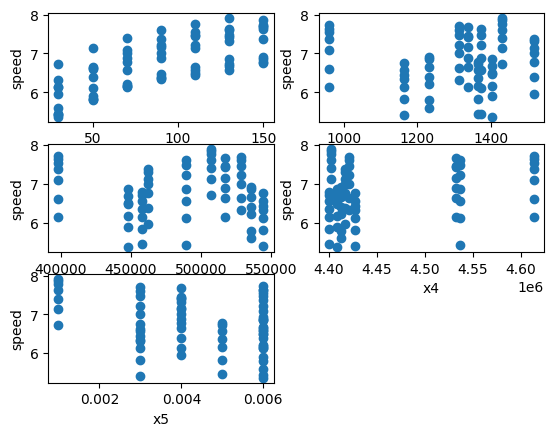

In [4]:
# scatter the figure of x1-x5 to speed

# list the factor need to plot
case = ['x1', 'x2', 'x3', 'x4', 'x5']

for i in range(5):
    # plot in a 3*2 subplot
    plt.subplot(3, 2, i+1)
    each = case[i]
    plt.scatter(data[each], data['speed'])
    title = each + '-speed'
    plt.xlabel(each)
    plt.ylabel('speed')
    # plt.title(title)
plt.show()

In [5]:
# check the correlation

corrr = []
p_val = []
for each in case:
    corr, p = scipy.stats.pearsonr(data[each], data['speed'])
    corrr.append(corr)
    p_val.append(p)

corr = pd.DataFrame({'var':case, 'corr':corrr, 'p-value':p_val})

print(corr)

  var      corr       p-value
0  x1  0.723630  1.475353e-12
1  x2  0.017586  8.851092e-01
2  x3 -0.057897  6.340190e-01
3  x4  0.239692  4.565899e-02
4  x5 -0.321288  6.688047e-03


In [6]:
# refrector the varies
# add the constant
x = sm.add_constant(data[case])

# creat the y
y = data['speed']

# creat the model
model = sm.OLS(y, x)

# calculate
result = model.fit()

# print the fit outcome
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     60.42
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           6.31e-23
Time:                        19:41:08   Log-Likelihood:                -9.7446
No. Observations:                  70   AIC:                             31.49
Df Residuals:                      64   BIC:                             44.98
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9444      3.338     -4.177      0.000     -20.614      -7.275
x1             0.0120      0.001     13.846      0.000       0.010       0.014
x2             0.0008      0.000      2.722      0.008       0.000       0.001
x3          -2.11e-06    9.5e-07     -2.220      0.030   -4.01e-06   -2.12e-07
x4          4.616e-06   6.61e-07      6.985      0.000     3.3e-06    5.94e-06
x5          -218.6066     25.440     -8.593      0.000    -269.429    -167.784
==============================================================================
Omnibus:                        3.217   Durbin-Watson:                   0.559
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                3.127
Skew:                          -0.469   Prob(JB):                        0.209
Kurtosis:                       2.563   Cond. No.                     3.28e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# refrector the varies
# add the constant
x = sm.add_constant(data[['x1', 'x4', 'x5']])

# creat the y
y = data['speed']

# creat the model
model = sm.OLS(y, x)

# calculate
result = model.fit()

# print the fit outcome
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     81.06
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           4.31e-22
Time:                        19:41:08   Log-Likelihood:                -16.739
No. Observations:                  70   AIC:                             41.48
Df Residuals:                      66   BIC:                             50.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5100      2.531     -4.547      0.000     -16.564      -6.456
x1             0.0120      0.001     12.724      0.000       0.010       0.014
x4          4.054e-06   5.77e-07      7.026      0.000     2.9e-06    5.21e-06
x5          -202.0754     25.356     -7.970      0.000    -252.700    -151.451
==============================================================================
Omnibus:                       16.549   Durbin-Watson:                   0.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.134
Skew:                          -1.191   Prob(JB):                     7.00e-05
Kurtosis:                       3.940   Cond. No.                     2.99e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""